# Today's Date - 21 June 2023
# Topic - Exponential Weighted Moving Average

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [39]:
df = pd.read_csv("/content/DailyDelhiClimateTest.csv", usecols=['date','meantemp'])

In [40]:
df.head()

,date,meantemp
0,2017-01-01,15.913043
1,2017-01-02,18.500000
2,2017-01-03,17.111111
3,2017-01-04,18.700000
4,2017-01-05,18.388889


### Plotting our dataset

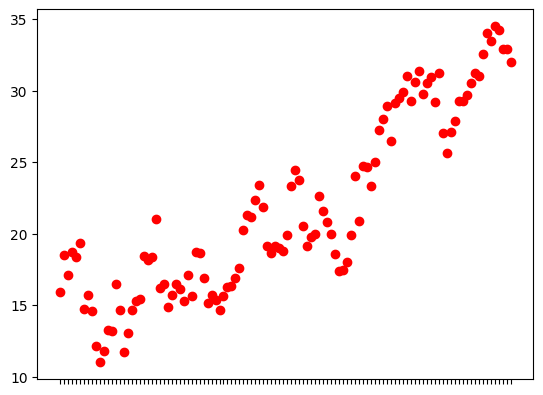

In [41]:
plt.scatter(x = df['date'], y = df['meantemp'], color='red')

ax = plt.gca()
ax.set_xticklabels([])
plt.show()

## Calcualting exponential weighted average for out dataset

### We will use inbuilt function from pandas

In [42]:
my_ewma = df['meantemp'].ewm(alpha=0.9).mean()

In [43]:
my_ewma

0      15.913043
1      18.264822
2      17.225443
3      18.552677
4      18.405266
         ...    
109    34.403401
110    34.265340
111    33.036534
112    32.891153
113    32.089115
Name: meantemp, Length: 114, dtype: float64

In [44]:
df['ewma'] = my_ewma
df.head()

,date,meantemp,ewma
0,2017-01-01,15.913043,15.913043
1,2017-01-02,18.500000,18.264822
2,2017-01-03,17.111111,17.225443
3,2017-01-04,18.700000,18.552677
4,2017-01-05,18.388889,18.405266


# Plotting graphs for different values of aplha

In [45]:
# range : 0 < alpha <= 1
a1 = df['meantemp'].ewm(alpha=1).mean()
a2 = df['meantemp'].ewm(alpha=0.95).mean()
a3 = df['meantemp'].ewm(alpha=0.9).mean()
a4 = df['meantemp'].ewm(alpha=0.5).mean()
a5 = df['meantemp'].ewm(alpha=0.1).mean()
a6 = df['meantemp'].ewm(alpha=0.0001).mean()

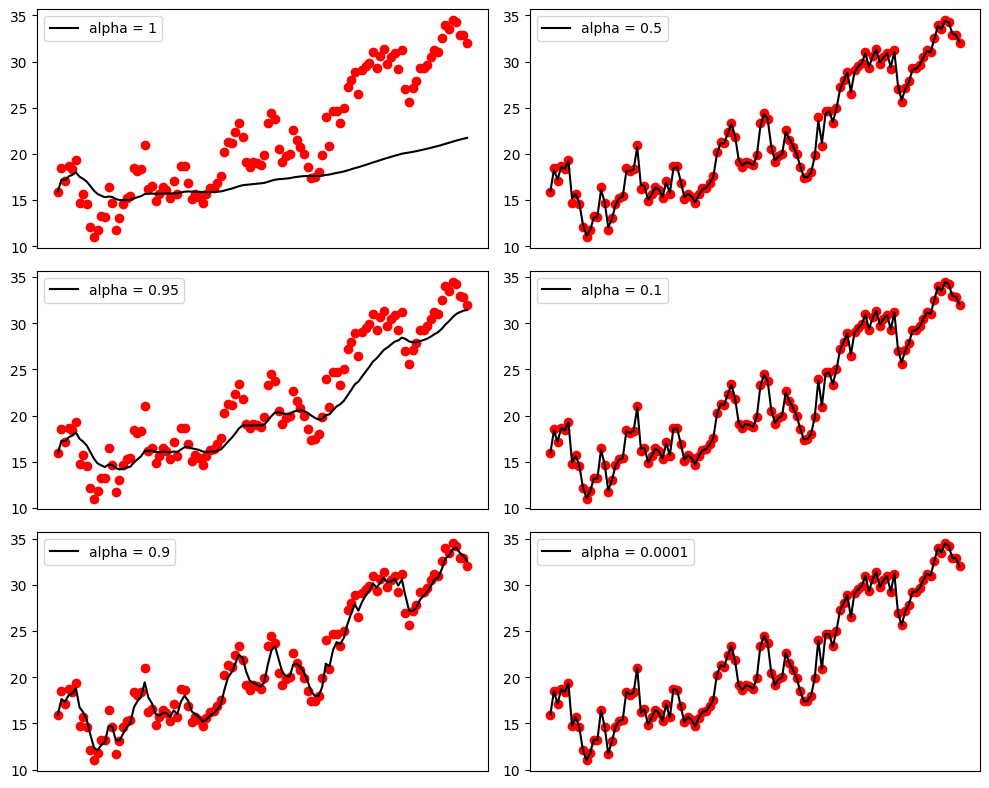

In [46]:
fig, axs = plt.subplots(3, 2, figsize=(10, 8))

axs[0,0].scatter(df['date'], df['meantemp'], color='red')
axs[0,0].plot(df['date'], a6, color='black', label='alpha = 1')
axs[0,0].set_xticks([])
axs[0,0].legend(loc='upper left')

axs[1,0].scatter(df['date'], df['meantemp'], color='red')
axs[1,0].plot(df['date'], a5, color='black', label='alpha = 0.95')
axs[1,0].set_xticks([])
axs[1,0].legend(loc='upper left')

axs[2,0].scatter(df['date'], df['meantemp'], color='red')
axs[2,0].plot(df['date'], a4, color='black', label='alpha = 0.9')
axs[2,0].set_xticks([])
axs[2,0].legend(loc='upper left')

axs[0,1].scatter(df['date'], df['meantemp'], color='red')
axs[0,1].plot(df['date'], a3, color='black', label='alpha = 0.5')
axs[0,1].set_xticks([])
axs[0,1].legend(loc='upper left')

axs[1,1].scatter(df['date'], df['meantemp'], color='red')
axs[1,1].plot(df['date'], a2, color='black', label='alpha = 0.1')
axs[1,1].set_xticks([])
axs[1,1].legend(loc='upper left')

axs[2,1].scatter(df['date'], df['meantemp'], color='red')
axs[2,1].plot(df['date'], a1, color='black', label='alpha = 0.0001')
axs[2,1].set_xticks([])
axs[2,1].legend(loc='upper left')

plt.tight_layout()
plt.show()

In [47]:
#     ALTERNATIVE CODE
# fig, axs = plt.subplots(3, 2, figsize=(10, 8))

# for i in range(3):
#   for j in range(2):
#     axs[i,j].scatter(df['date'], df['meantemp'], color='red')
#     axs[i,j].plot(df['date'], eval(f'a{i+j+1}'), color='black', label=f'a{i+1}') #from eval - a1,a2,a3,a4,a5,a6
#     axs[i,j].set_xticks([])
#     axs[i,j].legend(loc='upper left')